## Is the Number of Stolen Firearms Linear

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Does logistic regression work

In [3]:
viol_crime = pd.read_csv('..\data\processed\offenses_firearm_indicator.csv')
firearm_theft = pd.read_csv(r'C:\Users\brasw\Desktop\School\Fall 23\stats\stats-fp\data\processed\theft_mv_firearms.csv')

<ipython-input-3-e0eb150eac32>:1: DtypeWarning: Columns (11,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  viol_crime = pd.read_csv('..\data\processed\offenses_firearm_indicator.csv')
<ipython-input-3-e0eb150eac32>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  firearm_theft = pd.read_csv(r'C:\Users\brasw\Desktop\School\Fall 23\stats\stats-fp\data\processed\theft_mv_firearms.csv')


In [81]:
# lets just do virginia - aggregrate by year
firearm_crimes = viol_crime[(viol_crime['state_abb']=='VA')&(viol_crime['firearm_involved']==1)].groupby('year').agg(CtFirearmCrimes=('year', 'count'))

In [82]:
sum_stolen_firearms = firearm_theft[firearm_theft['state_abb']=='VA'].groupby('year').agg(SumFirearmsStolen=('NumFirearmsStolen', 'sum'))

In [83]:
# merge the two dataframes together
agg_data = firearm_crimes.merge(sum_stolen_firearms, on='year')

In [84]:
agg_data.reset_index(inplace=True)

# Some random virginia gun law
Implemented 2016: prohibited possessor

In [85]:
agg_data.loc[agg_data['year'] < 2016, 'PossessorLaw'] = 0
agg_data['PossessorLaw'].fillna(1, inplace=True)

In [86]:
agg_data

,year,CtFirearmCrimes,SumFirearmsStolen,PossessorLaw
0,2010.0,4955,2081,0.0
1,2011.0,4666,2098,0.0
2,2012.0,4498,2418,0.0
3,2013.0,4385,2417,0.0
4,2014.0,4392,2307,0.0
5,2015.0,4833,2686,0.0
6,2016.0,5568,3435,1.0
7,2017.0,4935,3757,1.0
8,2018.0,4511,3338,1.0
9,2019.0,4736,3500,1.0


In [87]:
va_viol_crime = viol_crime[viol_crime['state_abb']=='VA']

In [88]:
va_viol_crime = va_viol_crime[['ucr_offense_code', 'year', 'firearm_involved']]

In [89]:
dummies = pd.get_dummies(va_viol_crime['ucr_offense_code'])

In [90]:
for col in dummies.columns:
    dummies[col] = dummies[col].astype(int)

In [91]:
va_viol_crime = va_viol_crime.merge(dummies,left_index=True, right_index=True)

In [92]:
va_viol_crime.drop(columns=['ucr_offense_code'], inplace=True)

In [93]:
va_viol_crime = va_viol_crime.merge(agg_data, on='year')

In [94]:
va_viol_crime.head(20)

,year,firearm_involved,aggravated assault,murder/nonnegligent manslaughter,robbery,CtFirearmCrimes,SumFirearmsStolen,PossessorLaw
0,2010.0,0,1,0,0,4955,2081,0.0
1,2010.0,1,0,0,1,4955,2081,0.0
2,2010.0,0,1,0,0,4955,2081,0.0
3,2010.0,0,1,0,0,4955,2081,0.0
4,2010.0,0,0,1,0,4955,2081,0.0
5,2010.0,1,0,0,1,4955,2081,0.0
6,2010.0,1,0,0,1,4955,2081,0.0
7,2010.0,1,1,0,0,4955,2081,0.0
8,2010.0,1,0,0,1,4955,2081,0.0
9,2010.0,0,0,0,1,4955,2081,0.0


In [95]:
X = va_viol_crime[['year', 'aggravated assault', 'murder/nonnegligent manslaughter', 'robbery', 'CtFirearmCrimes', 'SumFirearmsStolen','PossessorLaw']]

In [96]:
y = va_viol_crime['firearm_involved']

In [97]:
lr = LogisticRegression().fit(X,y)

c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [98]:
lr.score(X, y)

c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\brasw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.6696536610287989

In [99]:
lr.coef_

array([[-4.54936705e-04, -1.08697549e+00,  9.16418092e-01,
         1.70297258e-01,  4.24206929e-05,  2.40835322e-04,
        -8.04130806e-02]])

In [100]:

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(lr.coef_[0])})

In [101]:
feature_importance = feature_importance.sort_values('Importance', ascending=True)

In [102]:
feature_importance

,Feature,Importance
4,CtFirearmCrimes,0.000042
5,SumFirearmsStolen,0.000241
0,year,0.000455
6,PossessorLaw,0.080413
3,robbery,0.170297
2,murder/nonnegligent manslaughter,0.916418
1,aggravated assault,1.086975


### Read in data, combine based on year/month for firearm involved crimes and stolen firearms

<ipython-input-7-f7c0bf7035d8>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  firearm_theft = pd.read_csv(r'C:\Users\brasw\Desktop\School\Fall 23\stats\stats-fp\data\processed\theft_mv_firearms.csv')


In [8]:
viol_crime['incident_mon'] = pd.to_datetime(viol_crime['incident_date']).dt.month
viol_mon_yr = viol_crime[viol_crime['firearm_involved'] == 1].groupby(['incident_mon','year'], as_index=False).agg(FirearmCrimes=('year', 'count'))

In [9]:
firearm_theft['incident_mon'] = pd.to_datetime(firearm_theft['incident_date']).dt.month
firearm_mon_yr = firearm_theft.groupby(['incident_mon', 'year']).agg(StolenFirearms=('NumFirearmsStolen', 'sum'))

In [10]:
data = viol_mon_yr.join(firearm_mon_yr, on=['incident_mon', 'year'])

### plot
looks linear

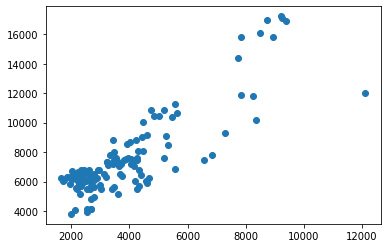

In [11]:
plt.scatter(data['StolenFirearms'], data['FirearmCrimes'])

### fit linear regression model

In [12]:
mod = sm.OLS(data['FirearmCrimes'], data['StolenFirearms'])

In [13]:
res = mod.fit()

In [14]:
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          FirearmCrimes   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              2085.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):                    2.49e-82
Time:                        19:48:11   Log-Likelihood:                         -1187.3
No. Observations:                 132   AIC:                                      2377.
Df Residuals:                     131   BIC:                                      2379.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

yea this is most likely colinear, need to run VIF test on it and figure out alternative methods. i suspect that doing rates on firearm: non-firearm crime would work

NameError: name 'plot_fit' is not defined

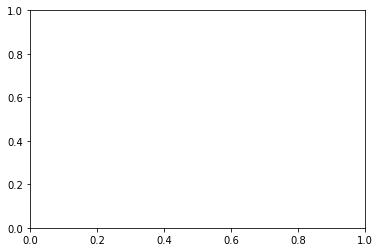

In [15]:
fig, ax = plt.subplots()
fig = plot_fit(res, 0, ax=ax)

In [ ]:
res.params

StolenFirearms    1.80262
dtype: float64

for every 1 stolen firearm the firearm crimes are going up 1.8

### Firearm laws - Chose Oregon and extra time for background checks - just cause the year worked out

In [ ]:
viol_crime = pd.read_csv('..\data\processed\offenses_firearm_indicator.csv')
laws = pd.read_csv(r'..\data\raw\firearmlaws.csv')

<ipython-input-56-ee31ea155fe6>:1: DtypeWarning:

Columns (11,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
laws[(laws['State'].str.contains('Ca')) & (laws['Law Class'] == 'background checks') & (laws['Effective Date Year'] == 2014)]

,Law ID,State,State Postal Abbreviation,FIPS Code,Law Class (num),Law Class,Law Class Subtype,Handguns or Long Guns,Effect,Type of Change,...,Supersession Date,Supersession Date Year,Supersession Date Month,Supersession Date Day,Controlling Law at Beginning of Period (1979),Age for Minimum Age Laws,"Length of Waiting Period (days, handguns)",Additional Context and Notes,Caveats and Ambiguities,Exception Code
219,CA1034,California,CA,6,1,background checks,extra time,handgun,Restrictive,Implement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gives U.S. Department of Justice up to 30 days...,NaN,NaN
259,CA1077,California,CA,6,1,background checks,extra time,long gun,Restrictive,Implement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gives U.S. Department of Justice up to 30 days...,NaN,NaN


# Restrict violent crime to californoregonia

In [ ]:
pd.unique(viol_crime['state_abb'])

array(['AL', 'AR', 'AZ', 'CO', 'CT', 'DC', 'DE', 'IA', 'ID', 'IL', 'KS',
       'KY', 'LA', 'MA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NE', 'ND', 'NH',
       'OH', 'OK', 'OR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'PA', 'IN', 'MD', 'MN', 'GA', 'HI', 'NM', 'NC',
       'NV', 'WY', 'NY'], dtype=object)

In [ ]:
viol_crime = viol_crime[viol_crime['state_abb']=='OR']

In [ ]:
viol_crime.drop(columns=['Unnamed: 0'], inplace=True)

<ipython-input-68-c765933d833e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
viol_crime['month'] = pd.to_datetime(viol_crime['incident_date']).dt.month
viol = viol_crime.groupby(['year', 'month'], as_index=False).agg(FirearmCrimes = ('firearm_involved', 'sum'))

In [18]:
viol = viol.merge(viol_crime.groupby(['year', 'month'], as_index=False).agg(TotalCount = ('year', 'count')), on=['year', 'month'])

In [19]:
viol['FirearmPercent'] = viol['FirearmCrimes'] / viol['TotalCount']

## Create a boolean for if the law exists or not. Treat as a categorical value

In [20]:
viol.loc[viol['year'] >= 2014, 'BgCheck'] = 1

In [21]:
viol['BgCheck'].fillna(0, inplace=True)

## Okay well this isn't actually usable - we'll have to restrict departments or something. they've got a clear ramp up in reporting (i.e., slowly adding more districts or something)

## However for the purposes of this, let's pretend it's all right

In [22]:
viol

,year,month,FirearmCrimes,TotalCount,FirearmPercent,BgCheck
0,2010.0,1,5633,19098,0.294952,0.0
1,2010.0,2,4034,15422,0.261574,0.0
2,2010.0,3,5477,20105,0.272420,0.0
3,2010.0,4,5955,21288,0.279735,0.0
4,2010.0,5,6337,22808,0.277841,0.0
...,...,...,...,...,...,...
127,2020.0,8,16912,44845,0.377121,1.0
128,2020.0,9,15811,41808,0.378181,1.0
129,2020.0,10,17229,43653,0.394681,1.0
130,2020.0,11,16974,41266,0.411331,1.0


### This looks like our Midterm now. We have a group of one law type (BgCheck or no BGCheck), percentages like the midterm? Is this not ANOVA? We can do t.test on this, we can do aov on this

In [23]:
from statsmodels.stats.anova import AnovaRM

In [25]:
viol

,year,month,FirearmCrimes,TotalCount,FirearmPercent,BgCheck
0,2010.0,1,5633,19098,0.294952,0.0
1,2010.0,2,4034,15422,0.261574,0.0
2,2010.0,3,5477,20105,0.272420,0.0
3,2010.0,4,5955,21288,0.279735,0.0
4,2010.0,5,6337,22808,0.277841,0.0
...,...,...,...,...,...,...
127,2020.0,8,16912,44845,0.377121,1.0
128,2020.0,9,15811,41808,0.378181,1.0
129,2020.0,10,17229,43653,0.394681,1.0
130,2020.0,11,16974,41266,0.411331,1.0


In [26]:
print(AnovaRM(data=viol, depvar='FirearmPercent', subject='BgCheck', within=['Year', 'Month']))

KeyError: Index(['Year', 'Month'], dtype='object')

In [ ]:
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 